In [2]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

from src.access import CopernicusDataspace
from src.aoi import LandSegment 
from src.sentinel2_data import Sentinel2Data
from src.utils import plot_ndvi

In [3]:
# Data collection parameters

# Area of interest
dist = 8 # km (Approximate diagonal of a 100 km2 square area)
city_name = "Barcelona"
segment = LandSegment(city=city_name,distance=dist)
aoi_wkt = segment.get_wkt_polygon()

# Cloud coverage
max_cloud_coverage = 20.0 # in percentage

# Timeframe
start_date = "2023-02-03"
end_date = "2024-02-05" # Use wide range to ensure data availability

In [4]:
copernicus = CopernicusDataspace(aoi_wkt, start_date, end_date, cloud_coverage=max_cloud_coverage)
copernicus.authenticate()

Introduce your credentials to authenticate.


In [5]:
# Use this cell to update the parameters of the CopernicusDataspace object if needed without reinitializing it

# Add new parameters here

new_params = {
    "aoi" : segment.get_wkt_polygon(),
    'start_date': start_date, 'end_date': end_date, 'cloud_coverage': max_cloud_coverage,}
copernicus.update_params(new_params)

In [6]:
# Connect to the Copernicus Data Space and show the catalogue

copernicus.connect_to_dataspace()
copernicus.print_catalogue() # Print the catalogue
catalogue_num = 1

    @odata.mediaContentType                                    Id  \
0  application/octet-stream  92eb6ee7-21a5-4639-b071-e0fe0b64b494   
1  application/octet-stream  da33ce4d-14ed-4685-8eac-305b49ceb0b4   
2  application/octet-stream  c3af2be0-6f18-4bbc-9d8c-923d98c231ec   
3  application/octet-stream  8c5cc7ee-8fec-4480-af77-5e4992db2eae   
4  application/octet-stream  03e37d03-8f77-495e-8225-962f412bcf76   

                                                Name  \
0  S2A_MSIL2A_20230820T103631_N0509_R008_T31TDF_2...   
1  S2A_MSIL2A_20240107T104431_N0510_R008_T31TDF_2...   
2  S2B_MSIL1C_20240122T104249_N0510_R008_T31TDF_2...   
3  S2B_MSIL2A_20240122T104249_N0510_R008_T31TDF_2...   
4  S2A_MSIL1C_20240107T104431_N0510_R008_T31TDF_2...   

                ContentType  ContentLength                OriginDate  \
0  application/octet-stream      819401794  2023-08-20T18:56:10.801Z   
1  application/octet-stream      954757964  2024-01-07T15:56:30.698Z   
2  application/octet-stream     

In [7]:
# Download the product from the Copernicus Data Space

prod_id = copernicus.extract_product_id(catalogue_num)
data_dir = f'../data/{city_name}.zip'
copernicus.download_product(prod_id, data_dir)

In [8]:
# Initialize the Sentinel2Data object

data_dir = f'../data/{city_name}.zip'
sentinel2 = Sentinel2Data(zip_file_path=data_dir)

# data_path = f'../data/{city_name}.../'
# sentinel2 = Sentinel2Data(data_path=data_path) ! Use this if the data is already unzipped


Band found with resolution {resolution}, using {band_path}
Band found with resolution {resolution}, using {band_path}
Only one band found for nir, using ../data/Barcelona/S2A_MSIL2A_20240107T104431_N0510_R008_T31TDF_20240107T145849.SAFE/GRANULE/L2A_T31TDF_A044621_20240107T104432/IMG_DATA/R10m/T31TDF_20240107T104431_B08_10m.jp2


/home/asopena/Documents/Job_Application/geoskop/geoskop_exercise/notebooks/../src/sentinel2_data.py:243: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


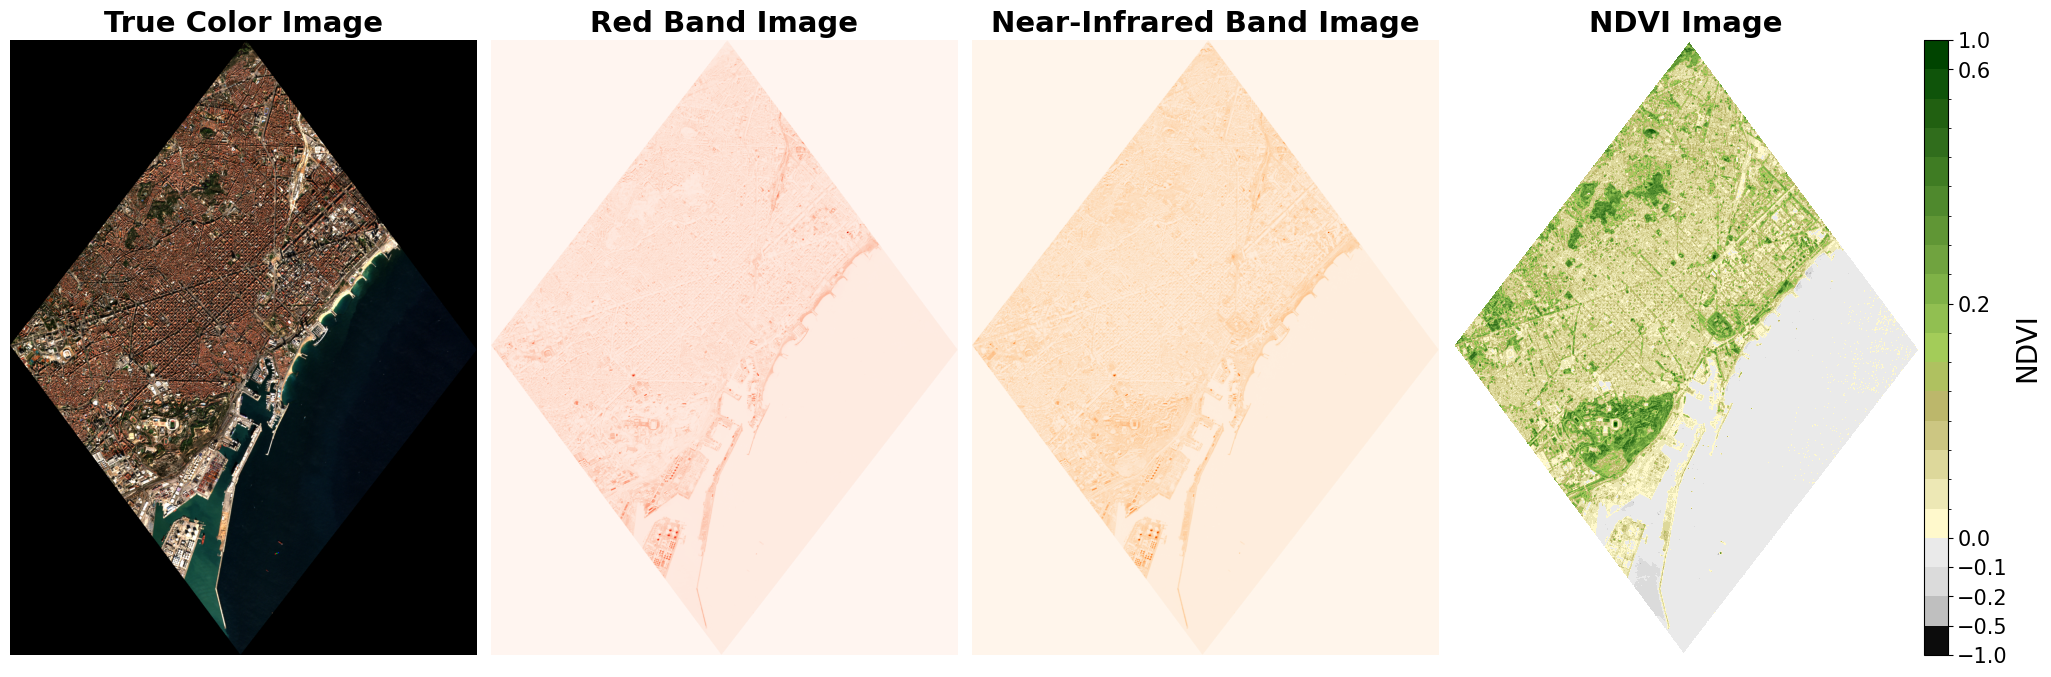

In [9]:
# Calculate and plot the NDVI for the area of interest (the aoi is usually smaller than the whole granule and calculation occurs faster)
resolution = "10m"
tci_image = sentinel2.get_band_image_arr("true_color", resolution=resolution, aoi=segment) # True color image
red_image, nir_image, ndvi_image = sentinel2.calculate_ndvi(resolution=resolution, aoi=segment) # NDVI image

fig, ax = plot_ndvi(tci_image, red_image, nir_image, ndvi_image)

In [ ]:
# Calculate and plot the NDVI for the whole downloaded granule (may require a lot of memory)
resolution = "10m"
tci_image = sentinel2.get_band_image_arr("true_color", resolution=resolution) # True color image
red_image, nir_image, ndvi_image = sentinel2.calculate_ndvi(resolution=resolution) # NDVI image

fig, ax = plot_ndvi(tci_image, red_image, nir_image, ndvi_image)